In [24]:
import pandas as pd
import numpy as np


df = pd.read_excel('myexcel.xlsx')

df['height'] = np.random.randint(150, 181, size=len(df))

print(df.head())

# Save the updated dataset 
df.to_excel('updated_dataset.xlsx', index=False)

            Name            Team  Number Position  Age               Height  \
0  Avery Bradley  Boston Celtics       0       PG   25  2023-02-06 00:00:00   
1    Jae Crowder  Boston Celtics      99       SF   25  2023-06-06 00:00:00   
2   John Holland  Boston Celtics      30       SG   27  2023-05-06 00:00:00   
3    R.J. Hunter  Boston Celtics      28       SG   22  2023-05-06 00:00:00   
4  Jonas Jerebko  Boston Celtics       8       PF   29  2023-10-06 00:00:00   

   Weight            College     Salary  height  
0     180              Texas  7730337.0     163  
1     235          Marquette  6796117.0     164  
2     205  Boston University        NaN     169  
3     185      Georgia State  1148640.0     171  
4     231                NaN  5000000.0     171  


In [29]:
import pandas as pd


df = pd.read_excel('updated_dataset.xlsx')

# Group by the "team" column to count employees 
team_distribution = df['Team'].value_counts()

team_percentage = (team_distribution / len(df)) * 100

team_summary = pd.DataFrame({
    'Team': team_distribution.index,
    'Employee Count': team_distribution.values,
    'Percentage': team_percentage.values
})

# Display 
print(team_summary)

#Save the summary to a new Excel file
team_summary.to_excel('team_distribution_summary.xlsx', index=False)

                      Team  Employee Count  Percentage
0     New Orleans Pelicans              19    4.148472
1        Memphis Grizzlies              18    3.930131
2                Utah Jazz              16    3.493450
3          New York Knicks              16    3.493450
4          Milwaukee Bucks              16    3.493450
5            Brooklyn Nets              15    3.275109
6   Portland Trail Blazers              15    3.275109
7    Oklahoma City Thunder              15    3.275109
8           Denver Nuggets              15    3.275109
9       Washington Wizards              15    3.275109
10              Miami Heat              15    3.275109
11       Charlotte Hornets              15    3.275109
12           Atlanta Hawks              15    3.275109
13       San Antonio Spurs              15    3.275109
14         Houston Rockets              15    3.275109
15          Boston Celtics              15    3.275109
16          Indiana Pacers              15    3.275109
17        

In [33]:
import pandas as pd

df = pd.read_excel('updated_dataset.xlsx')

position_distribution = df['Position'].value_counts()

position_summary = pd.DataFrame({
    'Position': position_distribution.index,
    'Employee Count': position_distribution.values
})

# Display the table
print(position_summary)

position_summary.to_excel('position_summary.xlsx', index=False)

  Position  Employee Count
0       SG             102
1       PF             100
2       PG              92
3       SF              85
4        C              79


In [35]:
import pandas as pd

df = pd.read_excel('updated_dataset.xlsx')

age_bins = [18, 30, 40, 50, 60]  # Customize the bins as needed
age_labels = ['18–30', '31–40', '41–50', '51–60']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Count employees in each age group
age_group_distribution = df['Age Group'].value_counts()

age_group_summary = pd.DataFrame({
    'Age Group': age_group_distribution.index,
    'Employee Count': age_group_distribution.values
})

# Display the table
print(age_group_summary)

#Save the summary to an Excel file 
age_group_summary.to_excel('age_group_summary.xlsx', index=False)

  Age Group  Employee Count
0     18–30             367
1     31–40              91
2     41–50               0
3     51–60               0


In [37]:
import pandas as pd

df = pd.read_excel('updated_dataset.xlsx')

salary_expenditure = df.groupby(['Team', 'Position'])['Salary'].sum().reset_index()

highest_expenditure = salary_expenditure.loc[salary_expenditure['Salary'].idxmax()]

# Display the results
print("Team with highest salary expenditure:", highest_expenditure['Team'])
print("Position with highest salary expenditure:", highest_expenditure['Position'])
print("Total Salary Expenditure:", highest_expenditure['Salary'])

salary_expenditure.to_excel('salary_expenditure_summary.xlsx', index=False)

Team with highest salary expenditure: Los Angeles Lakers
Position with highest salary expenditure: SF
Total Salary Expenditure: 31866445.0


Correlation between Age and Salary: 0.21400941226570974


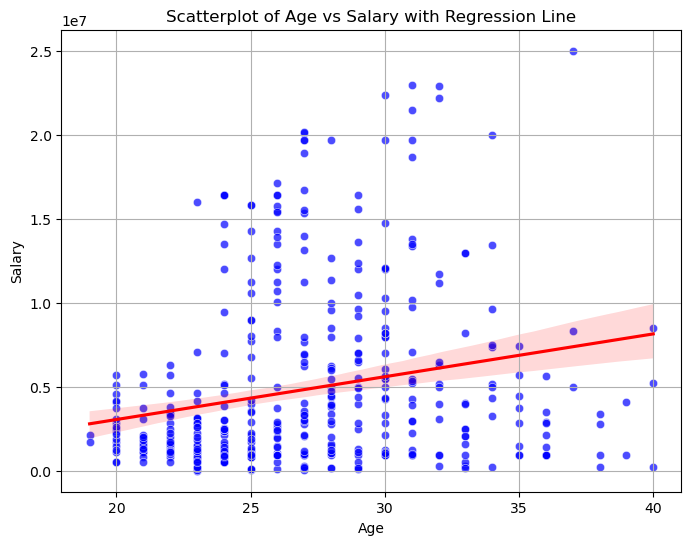

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('updated_dataset.xlsx')

correlation = df['Age'].corr(df['Salary'])
print(f"Correlation between Age and Salary: {correlation}")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Salary', color='blue', alpha=0.7)

sns.regplot(data=df, x='Age', y='Salary', scatter=False, color='red')

plt.title('Scatterplot of Age vs Salary with Regression Line')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

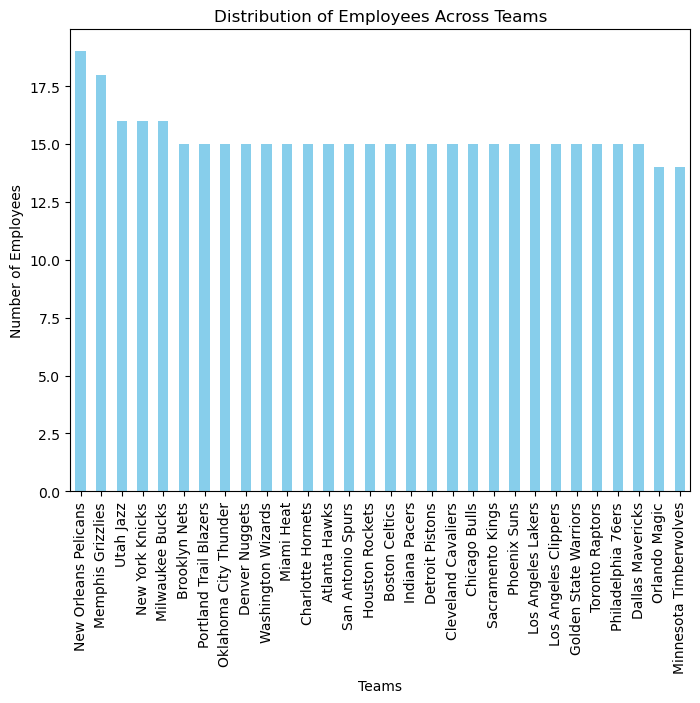

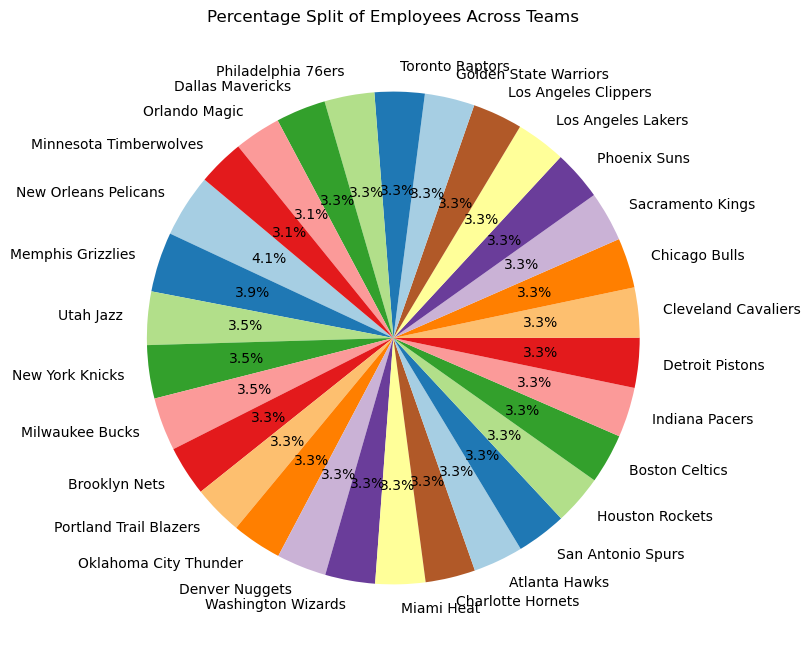

In [42]:
import matplotlib.pyplot as plt

# Bar chart
team_distribution = df['Team'].value_counts()
team_percentage = (team_distribution / len(df)) * 100
team_distribution.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Distribution of Employees Across Teams')
plt.xlabel('Teams')
plt.ylabel('Number of Employees')
plt.show()

# Pie chart 
team_percentage.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage Split of Employees Across Teams')
plt.ylabel('')  
plt.show()

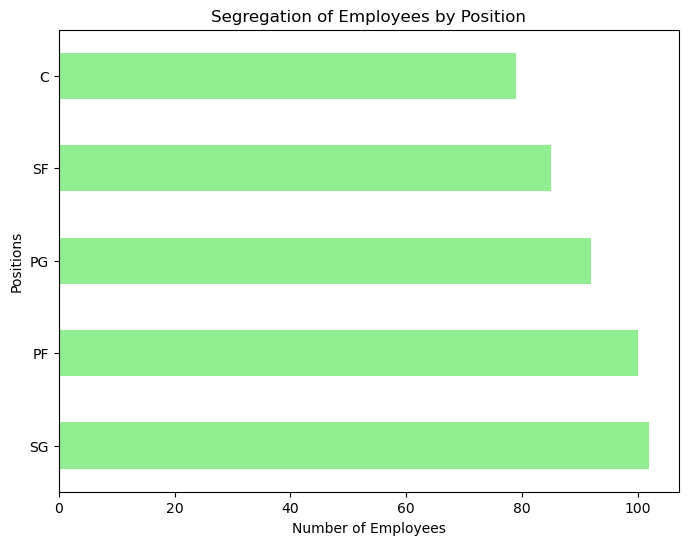

In [44]:
position_distribution = df['Position'].value_counts()
position_distribution.plot(kind='barh', color='lightgreen', figsize=(8, 6))
plt.title('Segregation of Employees by Position')
plt.xlabel('Number of Employees')
plt.ylabel('Positions')
plt.show()

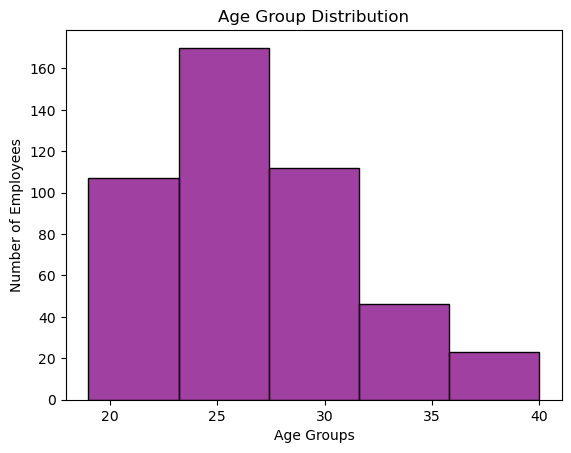

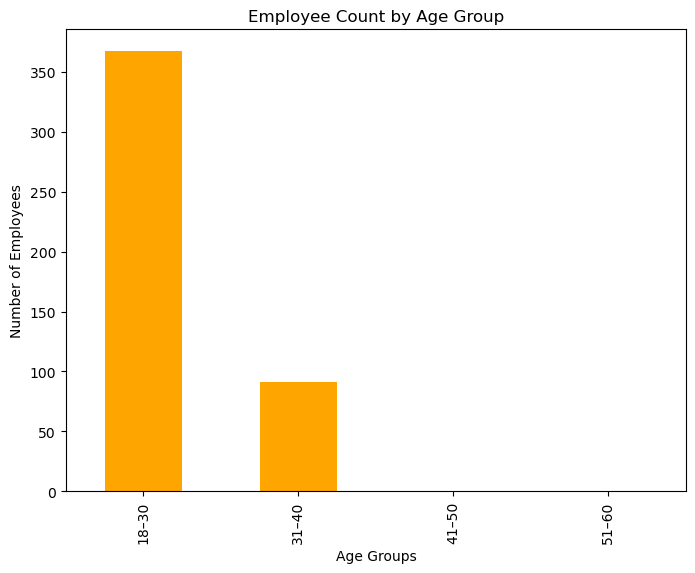

In [46]:
import seaborn as sns

# Histogram
sns.histplot(df['Age'], bins=5, kde=False, color='purple')
plt.title('Age Group Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Number of Employees')
plt.show()

# Bar chart 
age_group_distribution.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Employee Count by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Number of Employees')
plt.show()

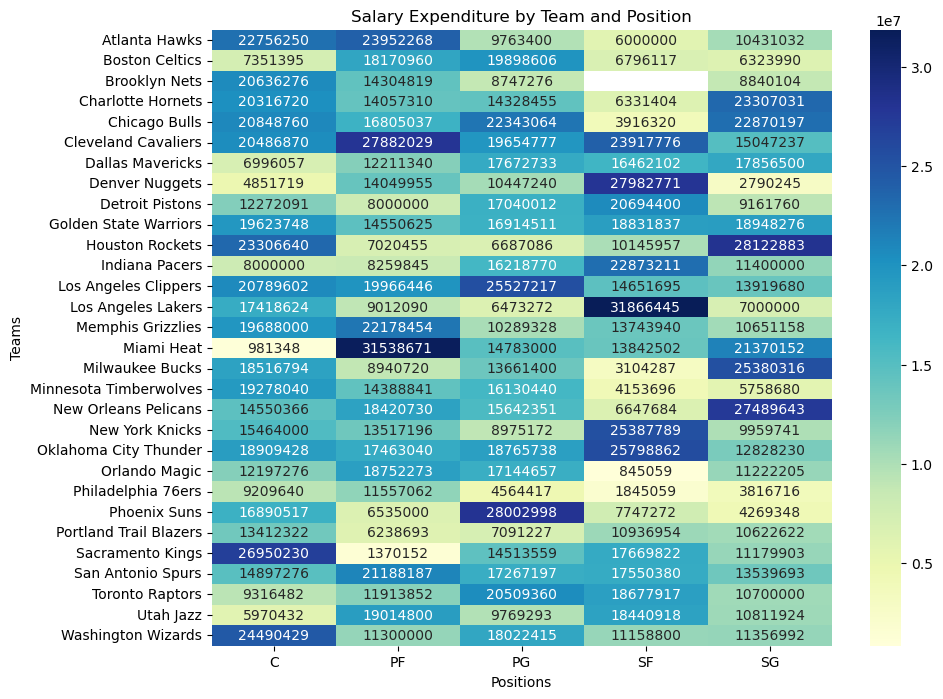

In [48]:
# Pivot matrix
salary_pivot = df.pivot_table(index='Team', columns='Position', values='Salary', aggfunc='sum')

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(salary_pivot, annot=True, fmt='.0f', cmap='YlGnBu', cbar=True)
plt.title('Salary Expenditure by Team and Position')
plt.xlabel('Positions')
plt.ylabel('Teams')
plt.show()